In [1]:
import os, sys
from pathlib import Path
import importlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
import pathlib

%matplotlib widget
sns.set_context('talk')

%tb
from eidynamics import utils, data_quality_checks, ephys_classes, pattern_index
import parse_data
import all_cells

Data parsing program imported
>> Working on:  \\storage.ncbs.res.in\adityaa\


No traceback available to show.


In [2]:
cellpath = pathlib.Path(r'C:\Users\user\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Analysis\testExamples\testCells\Sulu')

In [3]:
cell,_ = parse_data.parse_cell(cellpath, load_cell=False, save_pickle=True, add_cell_to_database=False, all_cell_response_db='', export_training_set=True, save_plots=False, user='Sulu')

[WindowsPath('C:/Users/user/OneDrive/NCBS/Lab/Projects/EI_Dynamics/Analysis/testExamples/testCells/Sulu/23306042.abf')]
Now analysing: 23306042.abf
Progress: |--------------------------------------------------------------------------------| 0.00%
ParameterFilePath:  C:\Users\user\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Analysis\testExamples\testCells\Sulu\PPFExpt_protocol_params_March06_23_23306042.py
Looking for experiment parameters locally
parameterFilePath:  C:\Users\user\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Analysis\testExamples\testCells\Sulu 
 paramfileName:  PPFExpt_protocol_params_March06_23_23306042
Experiment parameters loaded from:  C:\Users\user\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Analysis\testExamples\testCells\Sulu\PPFExpt_protocol_params_March06_23_23306042.py
No coord file found, probably there isn't one
Creating new cell.
Adding experiment 23306042.abf to the cell.
Loading ABF file
Datafile has 180 sweeps in 6 channels.
Neuron object saved into pickle. Use loadCel

C:\Users\user\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Analysis\eidynamics\ephys_functions.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  Ra_eff = np.round(1000 * (Vcmd) / (Itrans), 1)


###_ Running cell stability checks
#### Saving traces for training


C:\Users\user\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Analysis\eidynamics\ephys_classes.py:507: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  protocol_data.to_hdf(datasetFile, format='fixed', key=protocol, mode='w')
C:\Users\user\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Analysis\eidynamics\ephys_classes.py:507: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_items] [items->None]

  protocol_data.to_hdf(datasetFile, format='fixed', key=protocol, mode='w')
C:\Users\user\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Analysis\eidynamics\ephys_classes.py:507: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block4_values] [items->Index(['s

Cell Data exported to C:\Users\user\OneDrive\NCBS\Lab\Projects\EI_Dynamics\Analysis\testExamples\testCells\Sulu\cell1231_BG_dataset.h5
#### Saving pickle and excel files
Neuron object saved into pickle. Use loadCell to load back.


In [4]:
cell.data

{'FreqSweep': None,
 '1sq20Hz': None,
 'LTMRand': None,
 'SpikeTrain': None,
 'surprise': None,
 'convergence': None,
 'BG':      cellID sex ageAtInj ageAtExpt incubation unit protocol  exptSeq  exptID   
 0      1231   X  31 days  872 days   841 days   pA       BG      NaN    2330  \
 1      1231   X  31 days  872 days   841 days   pA       BG      NaN    2330   
 2      1231   X  31 days  872 days   841 days   pA       BG      NaN    2330   
 3      1231   X  31 days  872 days   841 days   pA       BG      NaN    2330   
 4      1231   X  31 days  872 days   841 days   pA       BG      NaN    2330   
 ..      ...  ..      ...       ...        ...  ...      ...      ...     ...   
 175    1231   X  31 days  872 days   841 days   pA       BG      NaN    2330   
 176    1231   X  31 days  872 days   841 days   pA       BG      NaN    2330   
 177    1231   X  31 days  872 days   841 days   pA       BG      NaN    2330   
 178    1231   X  31 days  872 days   841 days   pA       BG      

In [5]:
df = cell.data['BG']

In [6]:
df.sample(10)

,cellID,sex,ageAtInj,ageAtExpt,incubation,unit,protocol,exptSeq,exptID,sweep,...,79990,79991,79992,79993,79994,79995,79996,79997,79998,79999
162,1231,X,31 days,872 days,841 days,pA,BG,NaN,2330,163,...,2.344490,2.539938,2.820681,3.174443,3.588201,4.048795,4.543040,5.057429,5.577715,6.088772
159,1231,X,31 days,872 days,841 days,pA,BG,NaN,2330,160,...,-5.286070,-5.396226,-5.575060,-5.814175,-6.101777,-6.424570,-6.769433,-7.124482,-7.479437,-7.825451
0,1231,X,31 days,872 days,841 days,pA,BG,NaN,2330,1,...,3.988429,4.205513,4.482374,4.822974,5.228013,5.694167,6.213508,6.773313,7.356497,7.942626
116,1231,X,31 days,872 days,841 days,pA,BG,NaN,2330,117,...,3.465683,3.497834,3.603038,3.794489,4.078042,4.451720,4.905940,5.424392,5.985417,6.563743
134,1231,X,31 days,872 days,841 days,pA,BG,NaN,2330,135,...,1.117898,1.431522,1.853524,2.397401,3.069013,3.864793,4.770873,5.763229,6.808895,7.868178
78,1231,X,31 days,872 days,841 days,pA,BG,NaN,2330,79,...,6.118355,6.190789,6.173032,6.050672,5.815381,5.466607,5.012741,4.471432,3.868777,3.237247
174,1231,X,31 days,872 days,841 days,pA,BG,NaN,2330,175,...,7.190100,7.443283,7.812352,8.305057,8.922431,9.657599,10.495196,11.411509,12.375437,13.350315
1,1231,X,31 days,872 days,841 days,pA,BG,NaN,2330,2,...,3.268325,3.587338,4.193769,5.101492,6.308936,7.797338,9.529626,11.450565,13.488730,15.560631
55,1231,X,31 days,872 days,841 days,pA,BG,NaN,2330,56,...,6.207540,6.303514,6.477468,6.732751,7.069863,7.485481,7.971320,8.513278,9.091382,9.680897
64,1231,X,31 days,872 days,841 days,pA,BG,NaN,2330,65,...,9.963945,9.484004,8.973798,8.442666,7.899746,7.353431,6.811172,6.279666,5.765333,5.274854


In [7]:
df.iloc[0,:23]

cellID                         1231
sex                               X
ageAtInj           31 days 00:00:00
ageAtExpt         872 days 00:00:00
incubation        841 days 00:00:00
unit                             pA
protocol                         BG
exptSeq                         NaN
exptID                         2330
sweep                             1
stimFreq                        0.1
numSq                             0
intensity                       100
pulseWidth                        5
clampMode                        VC
clampPotential                  -70
condition                   Control
AP                            False
IR                        289.97972
tau                          4876.2
numPatterns                       0
patternList                       0
sweepBaseline            -74.584953
Name: 0, dtype: object

In [8]:
plt.close('all')

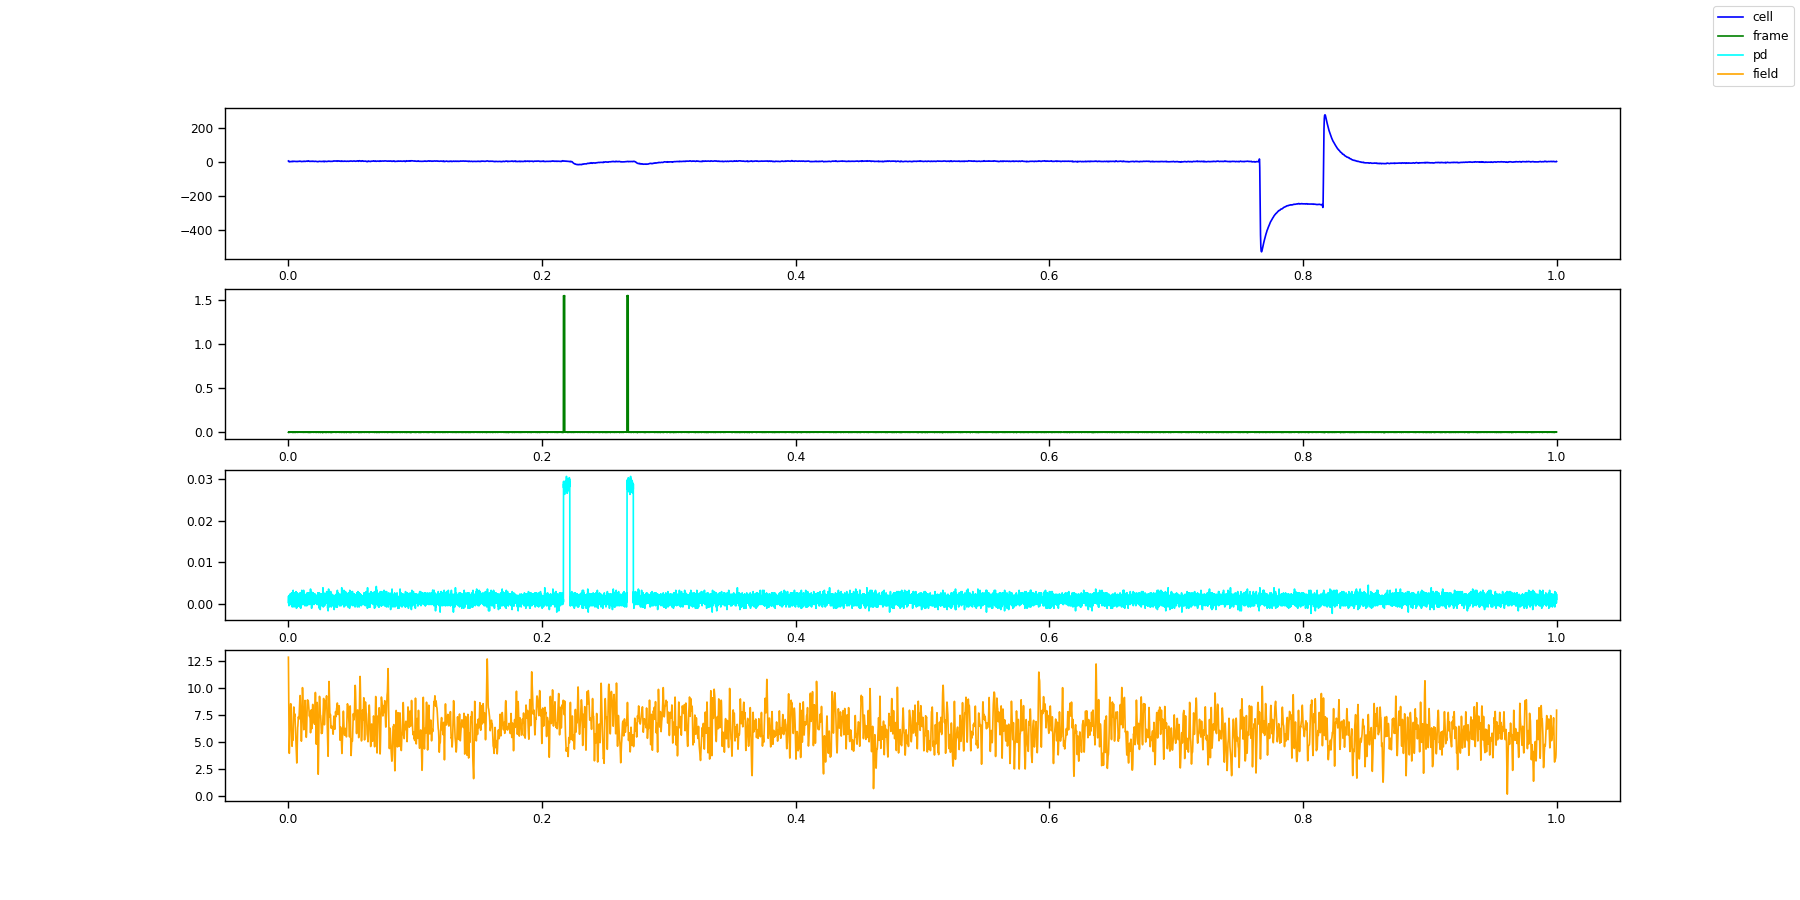

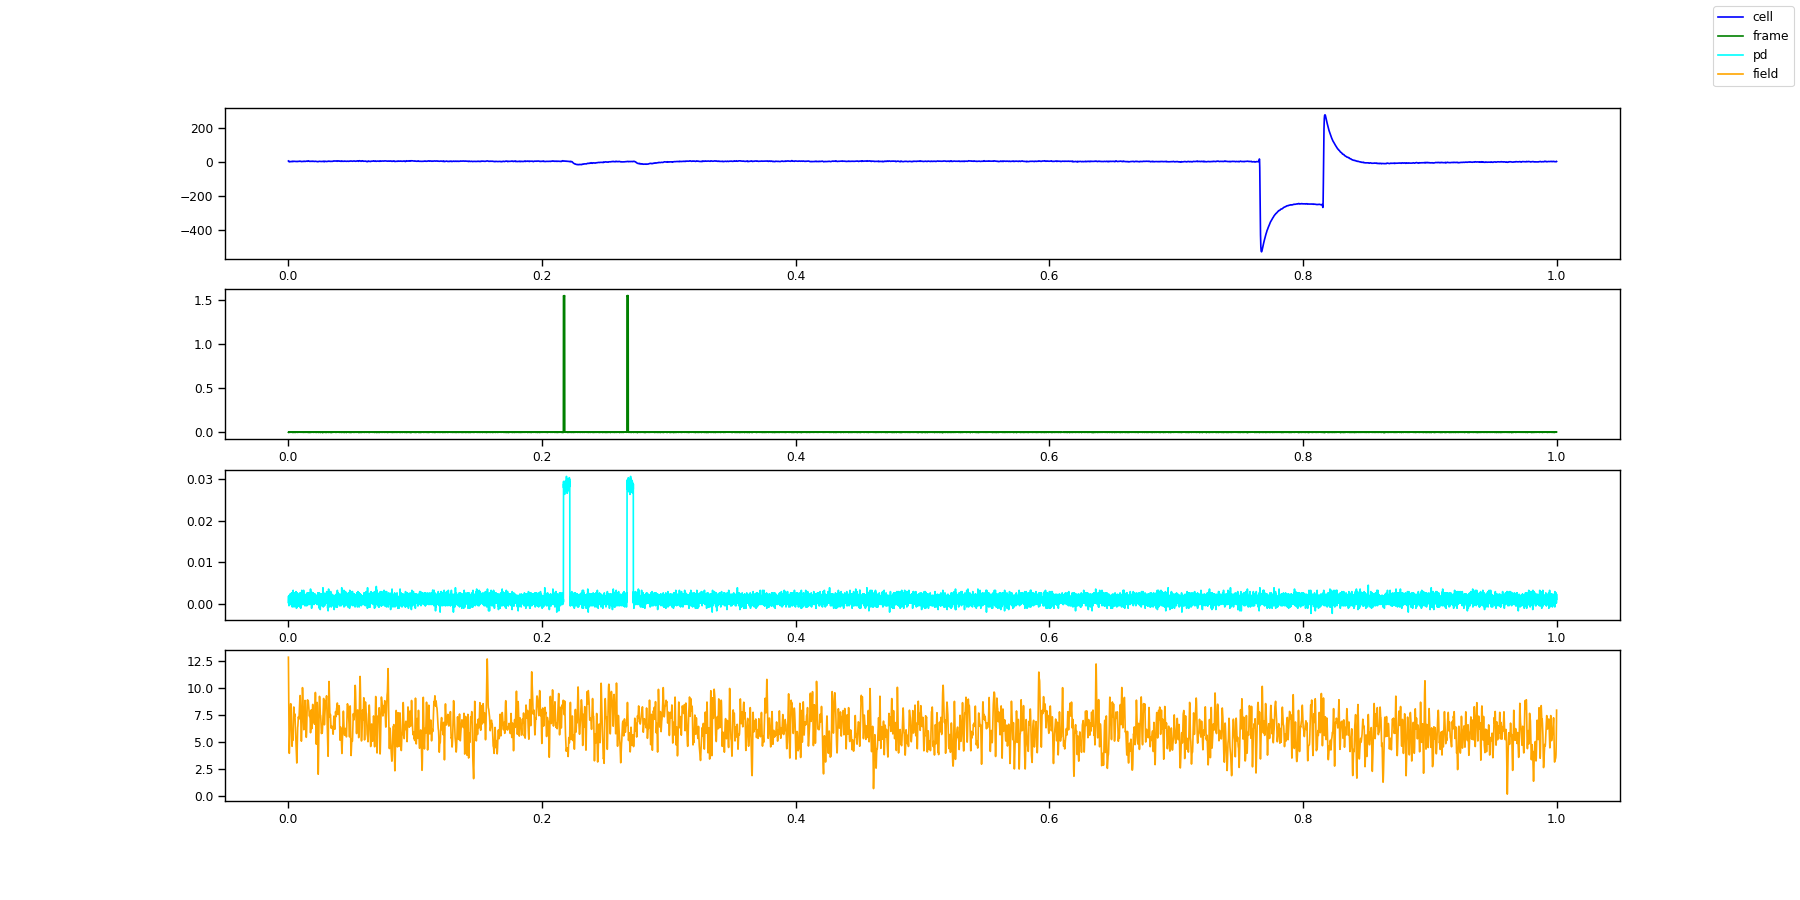

In [12]:
fig, axs = plt.subplots(4,1, figsize=(18,9))

row = df.iloc[0,:]

cell = row[23:20023]
frame= row[20023:40023]
pd   = row[40023:60023]
field= row[60023:80023]
time = np.linspace(0,1,20000)

axs[0].plot(time, cell, 'b', label='cell')
axs[1].plot(time, frame, 'g', label='frame')
axs[2].plot(time, pd, 'cyan', label='pd')
axs[3].plot(time, field, 'orange', label='field')
    
fig.legend()
fig.show()
    